In [1]:
import numpy as np_ # Original numpy 
import scipy as sp

import random

# Plot
from IPython.display import display, Latex
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator

# PennyLane
import pennylane as qml
from pennylane import numpy as np

# qnode device
dev = qml.device('default.mixed', wires = 1)

# Hamiltonian setup 
coeffs = [-0.5]
obs = [qml.PauliZ(0)]

hamiltonian = qml.Hamiltonian(coeffs, obs)  # Define Hamiltonian

In [2]:
# Global paras 
Tau_global = 5e-2   # Dephase tau
Paras_global, Phi_global  = np.zeros(2), 0

def Dephase_factor(tau):
    """ Take tau and return gamma based on the following relation."""

    Calculate_Gamma = 1 - np.exp(-2 * tau)
    
    return Calculate_Gamma    # Return gamma

In [3]:
Dephase_factor(2)

0.9816843611112658

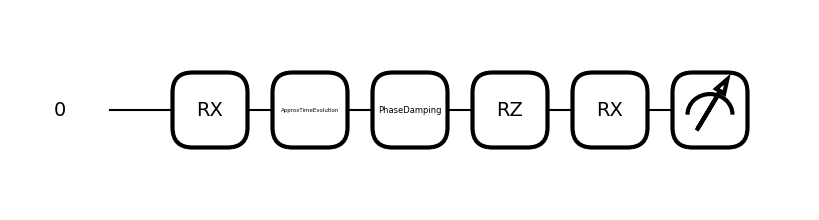

In [4]:
@qml.qnode(dev)
def circuit(phi):
    global Tau_global, Paras_global
    
    # Set dephase factor 
    gamma_dephase_in = Dephase_factor(Tau_global)  

    theta_x, phi_z = np.pi/2, np.pi/4

    qml.RX(np.pi/2, wires = 0)
    # qml.Hadamard(wires=0)

    qml.ApproxTimeEvolution(hamiltonian, phi, 1)
    qml.PhaseDamping(gamma_dephase_in, wires = 0)

    qml.RZ(phi_z, wires = 0)  # phi_z
    
    qml.RX(theta_x, wires = 0)  # theta_x
    
    return qml.density_matrix(wires = 0)

fig, ax = qml.draw_mpl(circuit)(1)

In [5]:
tau_plot = 0, 5e-2, 1e-1, 5e-1, 1, 2, 3, 4

range_sweep = np_.array([0, np.pi * 2 , 1e-2])
PHI = np_.arange(range_sweep[0], range_sweep[1], range_sweep[2]).reshape(-1, 1)
Data = np_.zeros((len(PHI), len(tau_plot) + 1))
Data[:, 0] = PHI.squeeze()

for tau_idx, tau in enumerate(tau_plot):
    Tau_global = tau
    for phi_idx, phi_current in enumerate(PHI):
        phi_in = np.array([phi_current])
        Data[phi_idx][tau_idx+1] = qml.qinfo.classical_fisher(circuit)(phi_in[0])

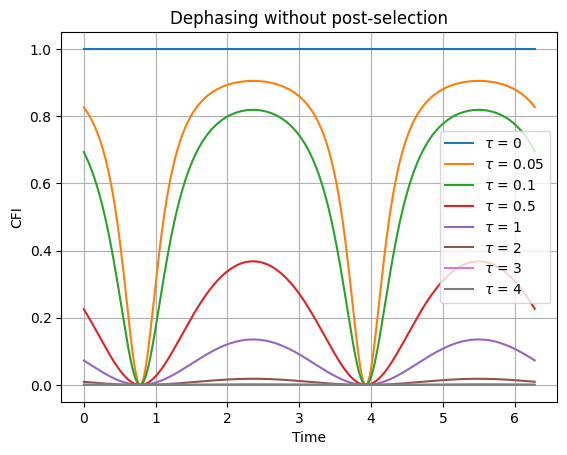

In [9]:
# DUMMY = np.zeros(len(Data[:, 0]))
# plt.plot(Data[:, 0], DUMMY, label = 'DUMMY')

for tau_idx, tau in enumerate(tau_plot):
    plt.plot(Data[:, 0], Data[:, 1 + tau_idx], label = f'$\\tau$ = {tau}')
    
    
plt.title('Dephasing without post-selection')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()

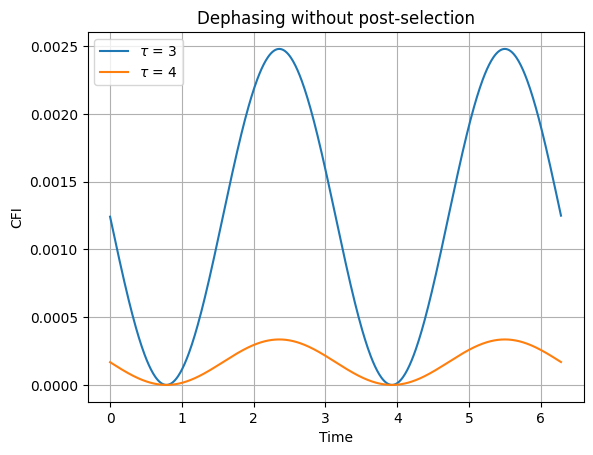

In [13]:
plt.plot(Data[:, 0], Data[:, 1 + 6], label = f'$\\tau$ = {tau_plot[6]}')
plt.plot(Data[:, 0], Data[:, 1 + 7], label = f'$\\tau$ = {tau_plot[7]}')
    
plt.title('Dephasing without post-selection')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()

In [7]:
# PHI = np.arange(range_sweep[0], range_sweep[1], range_sweep[2]).reshape(-1, 1)


# for phi_idx, phi_current in enumerate(PHI):
#     print(type(phi_current))